In [1]:
import matplotlib.pyplot as plt
import re
import cv2

In [2]:
# Open the file and read its data
def readFile (path):
    with open(path, encoding="utf8") as file:
        data = file.read()
    return data;

In [3]:
# Read captions from the file Flickr8k.token.txt
data = readFile ("data/textFiles/30k_captions.txt")

# Split the data into each line, to get a list of captions
captions = data.split('\n')
# Remove the last line since it is blank
captions = captions[:-1]

In [4]:
print("Total number of caption = " + str(len(captions)))

Total number of caption = 158915


In [5]:
print(captions[0])

1000092795.jpg#0	Two young guys with shaggy hair look at their hands while hanging out in the yard .


In [6]:
# Store the captions in a dictionary
# Each imageID will be mapped to a list of its captions

content = {}

for line in captions:
    imageID, caption = line.split('\t')

    imageID = imageID.split('.')[0]

    # If the imageID doesn't exist in the dictionary, create a blank entry
    if content.get(imageID) is None:
        content[imageID] = []

    # Append the current caption to the list of the corresponding image
    content[imageID].append(caption)

In [7]:
print(content[captions[0].split('.')[0]])

['Two young guys with shaggy hair look at their hands while hanging out in the yard .', 'Two young , White males are outside near many bushes .', 'Two men in green shirts are standing in a yard .', 'A man in a blue shirt standing in a garden .', 'Two friends enjoy time spent together .']


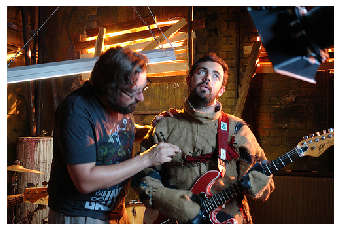

CAPTIONS - 
Two people in the photo are playing the guitar and the other is poking at him .
A man in green holds a guitar while the other man observes his shirt .
A man is fixing the guitar players costume .
a guy stitching up another man 's coat .
the two boys playing guitar


In [11]:
#Check that the captions have been mapped correctly

# Choose a random number, say 25

IMG_PATH = "data/Images/"
image_id = captions[25].split('.')[0]

img = cv2.imread(IMG_PATH + image_id + ".jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()

print("CAPTIONS - ")
for caption in content[image_id]:
    print(caption)

In [12]:
#Clean the data and save it into a new file

def clean (data):
    # Convert all characters to lower case
    data = data.lower()

    # Convert all non-alphabet characters to ' '
    data = re.sub("[^a-z]+", " ", data)

    return data

In [13]:
print(clean("A man in green holds a guitar while the other man observes his shirt ."))

a man in green holds a guitar while the other man observes his shirt 


In [14]:
for ID, caption_list in content.items():
    for i in range(len(caption_list)):
        content[ID][i] = clean(content[ID][i])

In [16]:
print(content[captions[25].split('.')[0]][-1])

the two boys playing guitar


In [17]:
#Store the cleaned captions as a file "tokens_clean.txt"


with open ("data/textFiles/tokens_clean.txt", "w") as file:
    file.write(str(content))

In [18]:
import os
Flickr_text_dir = "data/textFiles/30k_captions.txt"
Flickr_jpg_dir = "data/Images"
jpgs = os.listdir(Flickr_jpg_dir)  # os.listdir(path) returns list containing names of entries in directory given by path.
print("Number of .jpg flies in Flicker8k Dataset: {}".format(len(jpgs)))

Number of .jpg flies in Flicker8k Dataset: 31783


In [19]:
import pandas as pd
import numpy as np
file = open(Flickr_text_dir,'r', encoding="utf8") # Opening File
text = file.read() # Reading File
file.close() # Closing File
datatxt = []
for line in text.split('\n'): # Loop runs for No. of Images present
    col = line.split('\t') # Splits into 2 tuples on basis of '\t'
    if len(col) == 1:
        continue
    w = col[0].split("#") # Splits 1st tuple on basis of '#'
    datatxt.append(w + [col[1].lower()])
df_txt_flickr = pd.DataFrame(datatxt,columns=["filename","index","caption"])
uni_filenames = np.unique(df_txt_flickr.filename.values)  # uni_filenames stores unique file name e.g. '1000268201_693b08cb0e.jpg'
print("Total no. of Unique File Names: {}".format(len(uni_filenames)))

Total no. of Unique File Names: 31783


In [20]:
from collections import Counter
def df_word(df_txt_flickr):
    vocabulary = []  # Declared an empty list vocabulary 
    for i in range(len(df_txt_flickr)):
        temp = df_txt_flickr.iloc[i,2]  #.iloc[] is from 0 to length-1 & [ ,2] is selcted for 'caption'
        vocabulary.extend(temp.split())
    print('Total Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt_flickr)
dfword.head(10)  # Returns top 5 Rows of dfword

Total Vocabulary Size: 20324


,word,count
0,a,271698
1,.,151039
2,in,83466
3,the,62978
4,on,45669
5,and,44263
6,man,42598
7,is,41116
8,of,38776
9,with,36207


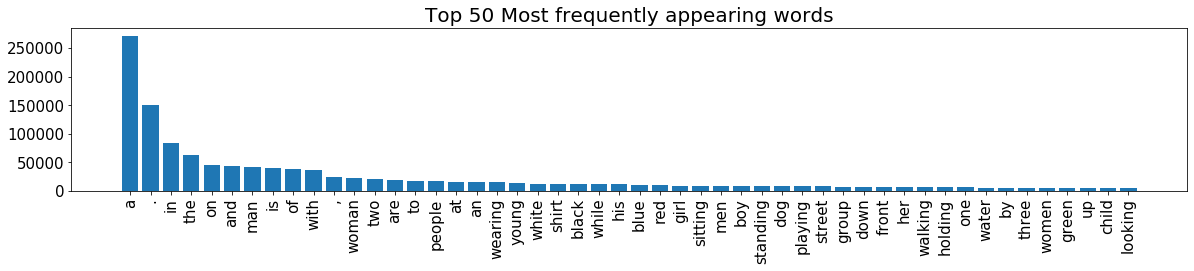

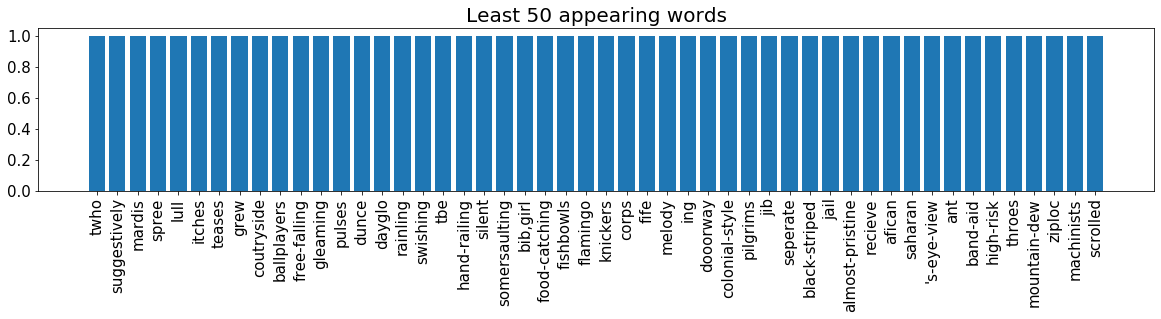

In [21]:
topn = 50  # Taking top 50 words
def plthist(dfsub, title):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=15)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=15)
    plt.title(title,fontsize=20)
    plt.show()
plthist(dfword.iloc[:topn,:],title="Top 50 Most frequently appearing words")
plthist(dfword.iloc[-topn:,:],title="Least 50 appearing words")